In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from statsmodels.tsa.stattools import acf
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import colors 
from scipy.stats import stats
import seaborn as sns
import pandas as pd 
import numpy as np
import os
%matplotlib inline

19 activities (a) 


8 users (p) 


60 segments (s) 


5 units on torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL) 


9 sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers) 


In [2]:
def generate_feature_names():
    '''Creates feature names for dataframe header'''
    feat_names = []
    for unit_label in ["T", "RA", "LA", "RL", "LL"]:
        for sensor  in ["acc","gyro","mag"]:
            for position in ['X','Y','Z']:
                feat_names.append(unit_label + "_" + position + sensor)
    return feat_names

In [3]:
def load_segment_names(home, data):
    '''Loads activity data for a specificed subset'''
    return [filename for filename in os.listdir(home + data)]

In [4]:
feat_names = generate_feature_names()

In [6]:
data_home = "/Users/abulf/Documents/Python_tutorial/Assignments/Machine_learning/clustering/data/"
user_data = "a01/p2/"

# load data for a single user that is walking in a parking lot
file_names = load_segment_names(data_home, user_data)
walk_file = data_home + user_data + file_names[0]
df = pd.read_csv(walk_file, names = feat_names)

In [7]:
df.shape

(125, 45)

In [8]:
df.head()

,T_Xacc,T_Yacc,T_Zacc,T_Xgyro,T_Ygyro,T_Zgyro,T_Xmag,T_Ymag,T_Zmag,RA_Xacc,...,RL_Zmag,LL_Xacc,LL_Yacc,LL_Zacc,LL_Xgyro,LL_Ygyro,LL_Zgyro,LL_Xmag,LL_Ymag,LL_Zmag
0,9.6704,-0.51576,-2.0166,0.089258,0.002864,0.045397,-0.98452,-0.43977,0.23738,1.2834,...,-0.026014,-2.6303,-8.9018,-3.0972,0.068475,0.024054,-0.004665,0.22847,0.54432,0.64756
1,9.6919,-0.62020,-1.9122,0.024094,-0.015040,0.006142,-0.98353,-0.43868,0.23971,1.2997,...,-0.028279,-2.6303,-8.9318,-3.0599,0.035085,0.012204,-0.008278,0.22808,0.54538,0.64607
2,9.5144,-0.42545,-2.0914,0.042181,-0.055196,-0.033808,-0.98325,-0.43984,0.24480,1.3583,...,-0.030927,-2.6381,-8.9102,-3.0286,-0.003977,-0.006542,-0.000141,0.22710,0.54497,0.64646
3,9.5444,-0.49162,-2.2781,0.011440,-0.031422,-0.010249,-0.98039,-0.44145,0.24612,1.2616,...,-0.031705,-2.6157,-8.9400,-3.0731,-0.029169,-0.013041,-0.006463,0.22746,0.54417,0.64768
4,9.5824,-0.38043,-2.3740,0.044331,0.020254,-0.015896,-0.97921,-0.44203,0.24830,1.4151,...,-0.032694,-2.6157,-8.8875,-3.1328,-0.018306,0.001380,-0.004587,0.22725,0.54416,0.64847


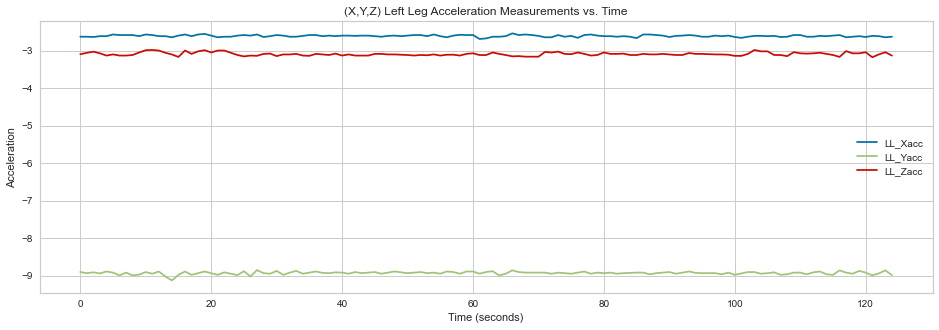

In [9]:
ax = \
df[["LL_Xacc", "LL_Yacc", "LL_Zacc"]].plot(title = "(X,Y,Z) Left Leg Acceleration Measurements vs. Time",
                                           figsize=(16,5));

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Acceleration");

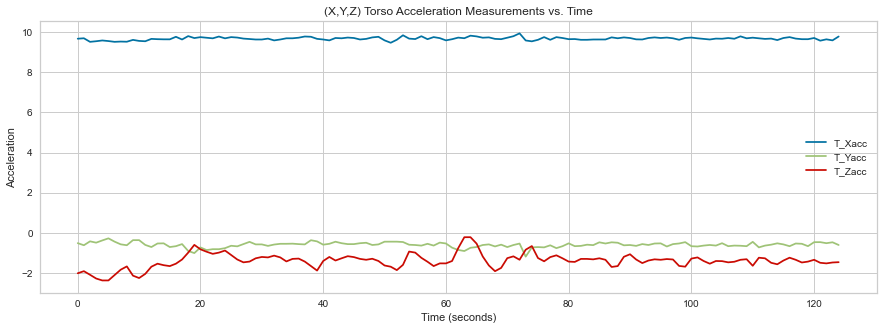

In [10]:
ax = \
df[["T_Xacc", "T_Yacc", "T_Zacc"]].plot(title = "(X,Y,Z) Torso Acceleration Measurements vs. Time",
                                        figsize=(15,5));
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Acceleration");

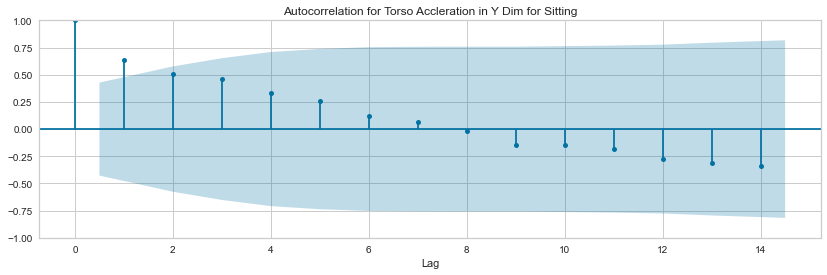

In [11]:
x = [ val[0] for val in df[["T_Yacc"]].values.tolist()]
auto_x = acf(x)

fig, ax = plt.subplots(figsize=(14,4))
title="Autocorrelation for Torso Accleration in Y Dim for Sitting"
ax.set_xlabel("Autocorrelation")
ax.set_xlabel("Lag")
plot_acf(auto_x, ax=ax, title=title);


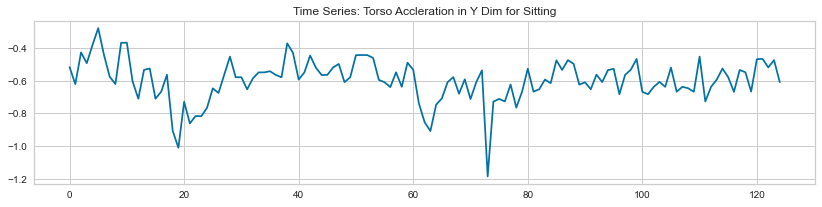

In [12]:
plt.figure(figsize=(14,3))
plt.title("Time Series: Torso Accleration in Y Dim for Sitting")
plt.plot(x);

In [13]:
df = pd.DataFrame(
	[[21, 72, 67],
	[23, 78, 69],
	[32, 74, 56],
	[52, 54, 76]],
	columns=['a', 'b', 'c'])

print('DataFrame\n----------\n', df)

#convert dataframe to numpy array
arr = df.to_numpy()

print('\nNumpy Array\n----------\n', arr)
arr = arr.flatten('F')
arr

DataFrame
----------
     a   b   c
0  21  72  67
1  23  78  69
2  32  74  56
3  52  54  76

Numpy Array
----------
 [[21 72 67]
 [23 78 69]
 [32 74 56]
 [52 54 76]]


array([21, 23, 32, 52, 72, 78, 74, 54, 67, 69, 56, 76], dtype=int64)

In [14]:
def get_segment_features(data):
    list = []
    '''Returns the extracted features for each of the original 45 features'''
    mean = np.mean(data)
    std = np.std(data)
    kurtosis = stats.kurtosis(data)
    skew = stats.skew(data)
    min = np.amin(data)
    max = np.max(data)
    list.append(mean)
    list.append(std)
    list.append(kurtosis)
    list.append(skew)
    list.append(min)
    list.append(max)
    #print(list)
    #print(len(list))
    return list
    

def expand_features(df, label):
    '''Append the extracted fetures to each of the original 45 features'''
    #data = df.T.values.tolist()
    data = df.to_numpy()
    data = data.flatten('F')
    data_extracted_features = get_segment_features(data)
    data_extracted_features.append(label)
    #print(data_extracted_features) 
    return data_extracted_features

def get_activity_files_names():
    '''Creates activity file names'''
    activity_files = []
    for num in np.arange(1,20,1):
        if num < 10:
            activity_files.append("a0{}".format(num))
        else:
            activity_files.append("a{}".format(num))
    return activity_files

def get_segment_files_names():
    '''Creates segment file names'''
    segment_files = []
    for num in np.arange(1,61,1):
        if num < 10:
            segment_files.append("s0{}.txt".format(num))
        else:
            segment_files.append("s{}.txt".format(num))
    return segment_files

In [15]:
def transform_data(activity_files, person_files, segment_files):
    '''loads data, extracts features, and transforms data'''
    Activity = defaultdict(list)
    # for activity_i
    for act_i, activity in enumerate(activity_files):
        act_i += 1
        # for person_j
        for per_i, person in enumerate(person_files):
            per_i += 1
            # for segment_k
            for seg_i, segment in enumerate(segment_files): 
                seg_i += 1
                # load segment data
                segment_path = data_home + activity + "/" + person + "/" + segment
                # put data in dataframe
                df = pd.read_csv(segment_path, header=None)
                # feature expand 5 second segment 
                new_data = expand_features(df, person)
                # each segment is now a row 
                Activity[act_i].append(new_data)
                print(Activity)
                break  
    return Activity

In [16]:
activity_files = get_activity_files_names()
activity_files[0:5]

['a01', 'a02', 'a03', 'a04', 'a05']

In [17]:
segment_files =  get_segment_files_names()
segment_files[0:5]

['s01.txt', 's02.txt', 's03.txt', 's04.txt', 's05.txt']

In [18]:
person_files = ["p{}".format(num) for num in np.arange(1,9,1)]
person_files

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

In [19]:
activity_data = transform_data(activity_files, person_files, segment_files)

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1']]})
defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2']]})
defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3']]})
defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.390288350

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stat

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

defaultdict(<class 'list'>, {1: [[0.4960874124444444, 3.2443831935299823, 2.6638474626635853, 0.07434145495329483, -9.1124, 9.0955, 'p1'], [-0.025520347377777742, 3.285200629317622, 3.961105225808134, 0.45289063659135814, -10.208, 10.521, 'p2'], [0.3902883509333332, 3.2589138811573175, 3.6695516238784585, 0.7014327145002666, -9.7442, 9.7503, 'p3'], [0.33264534453333333, 3.262945153492497, 2.8141490193320005, 0.7210730366571677, -9.1678, 9.2888, 'p4'], [0.4494755034666667, 3.2510458790057086, 2.707113385332528, 0.7131540185426516, -9.3435, 9.0516, 'p5'], [0.07211963182222215, 3.2804444555231935, 3.5281162836872495, 0.04858120636064472, -9.6246, 9.7602, 'p6'], [0.5215694536888889, 3.2848824868718487, 2.4626697575949423, 0.7303102165245003, -14.527, 14.341, 'p7'], [0.06734300663055995, 3.2817649385143475, 2.718402962167592, 0.19928702650381863, -9.4631, 9.4267, 'p8']], 2: [[0.25350550702222213, 3.2693773351851183, 4.077645743102539, -0.030453316311406083, -9.7975, 9.2462, 'p1'], [0.276296

C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  kurtosis = stats.kurtosis(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:7: DeprecationWarning: Please use `skew` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  skew = stats.skew(data)
C:\Users\abulf\AppData\Local\Temp\ipykernel_8916\2315846616.py:6: DeprecationWarning: Please use `kurtosis` from the `scipy.

In [19]:
np.array(activity_data[1]).shape

(480, 7)

IMPORTANT NOTE: Do not try to find shape of dicctionary more than 19 because it does not raise error key not found as I am making dictionary using defaultdict(list) so instead of giving error it adds the length so when we find length of dictionary it gives more than 19

In [20]:
len(activity_data)

19

In [21]:
ddf = []
for key in activity_data.keys():
    df = pd.DataFrame(activity_data[key], columns = ['mean', 'std', 'kurtosis', 'skew', 'min', 'max', 'player_name'])
    ddf.append(df)
    

In [22]:
len(ddf)

19

In [23]:
ddf[0]

,mean,std,kurtosis,skew,min,max,player_name
0,0.496087,3.244383,2.663847,0.074341,-9.1124,9.0955,p1
1,0.495131,3.244381,2.661830,0.069005,-9.1197,9.0874,p1
2,0.491601,3.244910,2.674041,0.062978,-9.1219,9.0944,p1
3,0.491994,3.244963,2.664853,0.060485,-9.1151,9.1229,p1
4,0.490558,3.244950,2.664961,0.057331,-9.1158,9.1076,p1
...,...,...,...,...,...,...,...
475,0.196491,3.278126,2.623130,0.247915,-8.7343,9.2821,p8
476,0.203135,3.277756,2.627329,0.251066,-8.7821,9.3015,p8
477,0.206319,3.277504,2.633597,0.257347,-8.7575,9.2937,p8
478,0.209857,3.276920,2.640281,0.260858,-8.7831,9.2920,p8


In [24]:
le = LabelEncoder()
for df in ddf:
  le.fit(df.player_name)
  df.player_name = le.transform(df.player_name)  



In [25]:
ddf[0]

,mean,std,kurtosis,skew,min,max,player_name
0,0.496087,3.244383,2.663847,0.074341,-9.1124,9.0955,0
1,0.495131,3.244381,2.661830,0.069005,-9.1197,9.0874,0
2,0.491601,3.244910,2.674041,0.062978,-9.1219,9.0944,0
3,0.491994,3.244963,2.664853,0.060485,-9.1151,9.1229,0
4,0.490558,3.244950,2.664961,0.057331,-9.1158,9.1076,0
...,...,...,...,...,...,...,...
475,0.196491,3.278126,2.623130,0.247915,-8.7343,9.2821,7
476,0.203135,3.277756,2.627329,0.251066,-8.7821,9.3015,7
477,0.206319,3.277504,2.633597,0.257347,-8.7575,9.2937,7
478,0.209857,3.276920,2.640281,0.260858,-8.7831,9.2920,7


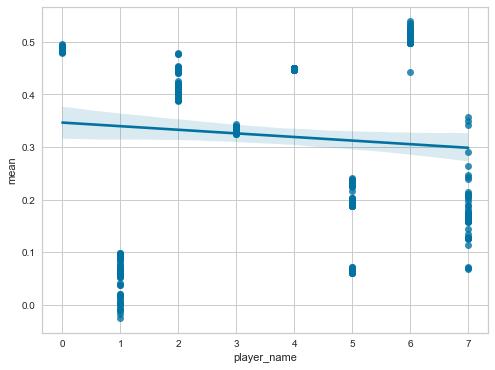

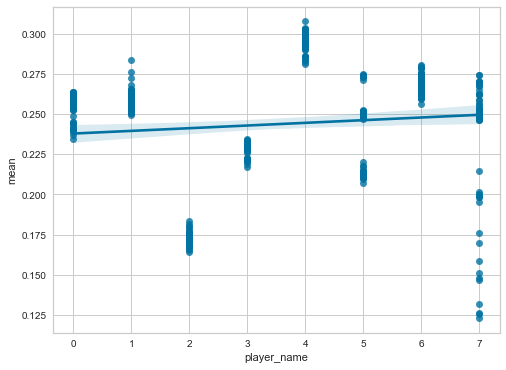

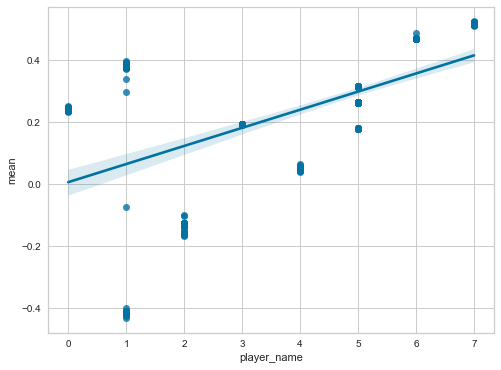

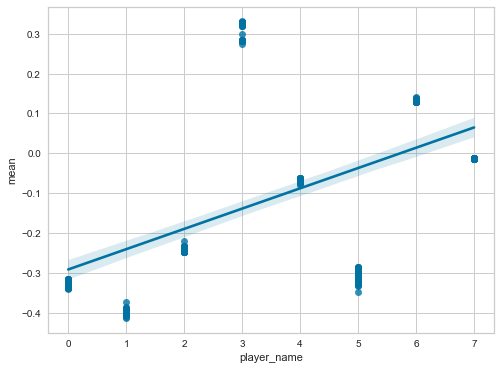

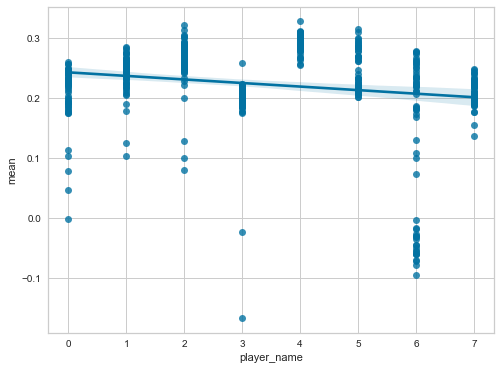

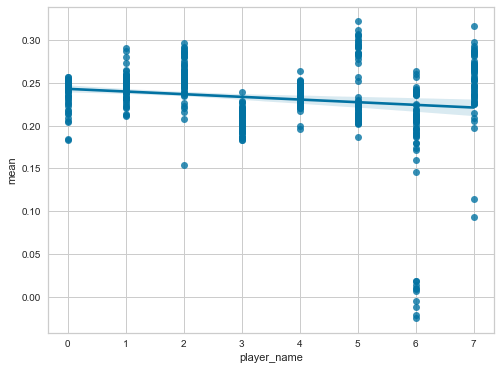

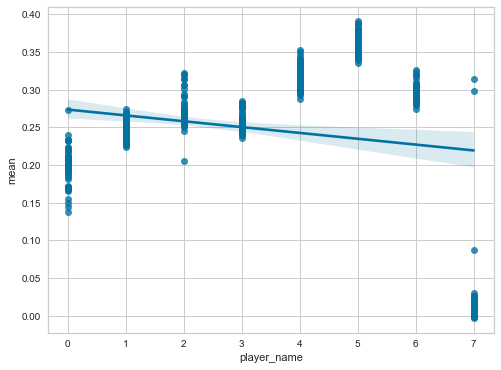

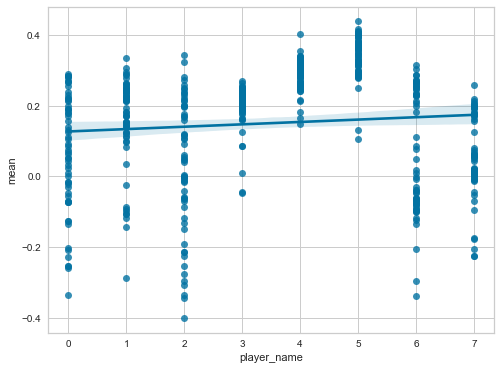

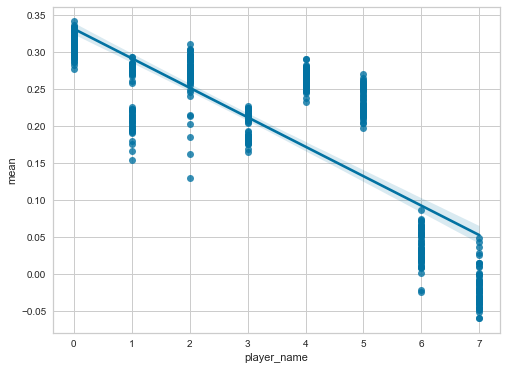

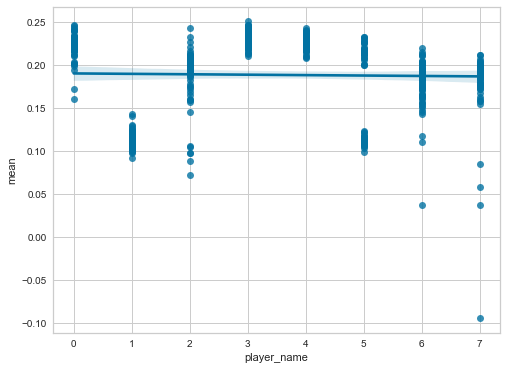

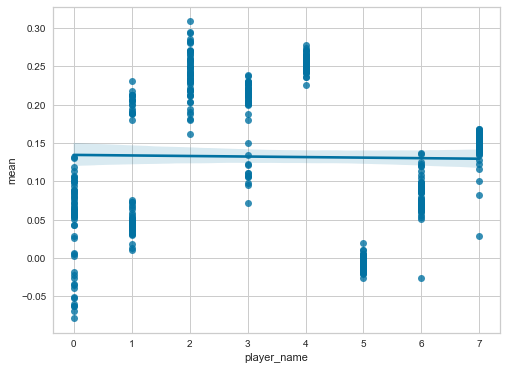

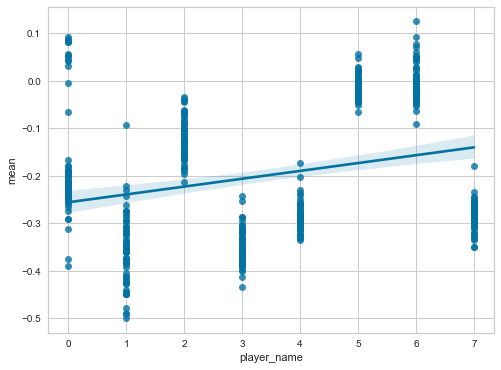

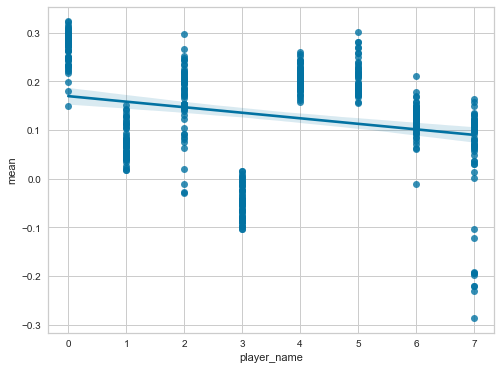

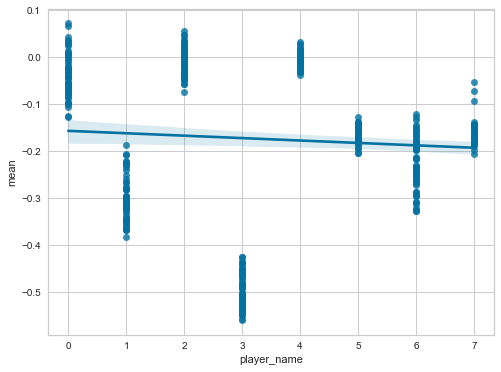

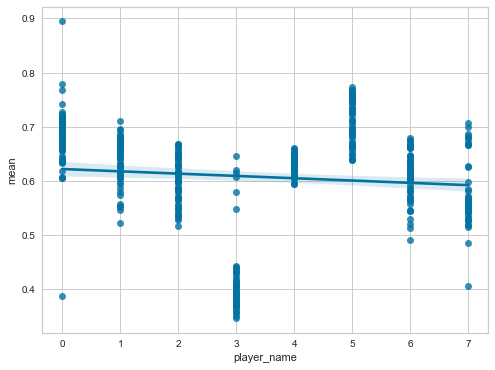

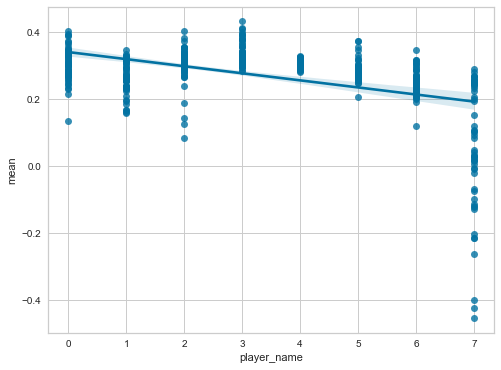

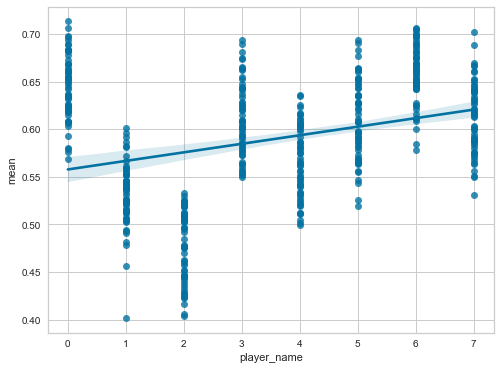

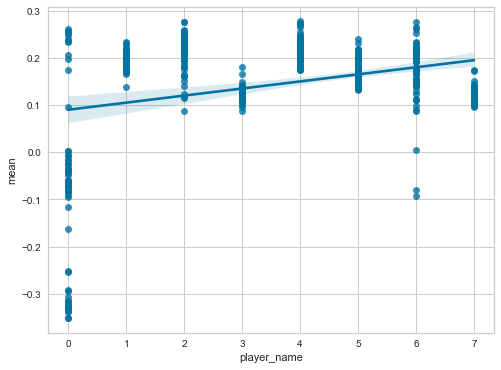

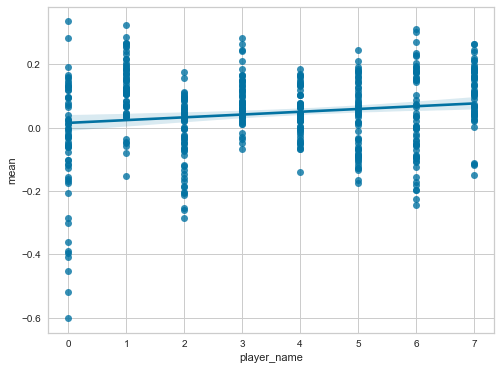

In [26]:
for df in ddf:
    plt.figure(figsize=(8,6))
    sns.regplot(x = df["player_name"], y = df["mean"])
    plt.show()

In [27]:
for df in ddf:
    rfm_df = df[['mean', 'std', 'kurtosis', 'skew', 'min', 'max']]
    columns = df.columns
    for i in columns:
        if df.dtypes[i] is object:
            print("Cannot process object data")
    

    ## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
    scale_list = []
    normalise_list = []
    data_skew = df.skew()

    for i in columns:
        if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
            scale_list.append(i)
        else:
            normalise_list.append(i)
    print(scale_list)
    print(normalise_list)
    break

['mean', 'std', 'kurtosis', 'player_name']
['skew', 'min', 'max']


In [28]:
for df in ddf:
    col_names = ['mean', 'std', 'kurtosis']
    features = df[col_names]
    scaler = preprocessing.StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    print(df)

         mean       std  kurtosis      skew     min     max  player_name
0    1.033970 -1.256497 -0.397320  0.074341 -9.1124  9.0955            0
1    1.028270 -1.256659 -0.400819  0.069005 -9.1197  9.0874            0
2    1.007246 -1.220574 -0.379639  0.062978 -9.1219  9.0944            0
3    1.009589 -1.216973 -0.395576  0.060485 -9.1151  9.1229            0
4    1.001035 -1.217856 -0.395388  0.057331 -9.1158  9.1076            0
..        ...       ...       ...       ...     ...     ...          ...
475 -0.750568  1.043073 -0.467948  0.247915 -8.7343  9.2821            7
476 -0.710991  1.017831 -0.460664  0.251066 -8.7821  9.3015            7
477 -0.692024  1.000671 -0.449793  0.257347 -8.7575  9.2937            7
478 -0.670953  0.960915 -0.438198  0.260858 -8.7831  9.2920            7
479 -0.661536  0.963769 -0.421360  0.261864 -8.8035  9.2864            7

[480 rows x 7 columns]
         mean       std  kurtosis      skew     min     max  player_name
0    0.257159 -0.057689 -1.

In [29]:
for df in ddf:
    col_names = ['skew', 'min', 'max']
    features = df[col_names]
    scaler_1 = preprocessing.MinMaxScaler().fit(features.values)
    features = scaler_1.transform(features.values)
    df[col_names] = features
    print(df)

         mean       std  kurtosis      skew       min       max  player_name
0    1.033970 -1.256497 -0.397320  0.103574  0.943566  0.152037            0
1    1.028270 -1.256659 -0.400819  0.097570  0.942808  0.150727            0
2    1.007246 -1.220574 -0.379639  0.090788  0.942579  0.151859            0
3    1.009589 -1.216973 -0.395576  0.087983  0.943286  0.156466            0
4    1.001035 -1.217856 -0.395388  0.084434  0.943213  0.153993            0
..        ...       ...       ...       ...       ...       ...          ...
475 -0.750568  1.043073 -0.467948  0.298876  0.982877  0.182202            7
476 -0.710991  1.017831 -0.460664  0.302422  0.977907  0.185338            7
477 -0.692024  1.000671 -0.449793  0.309489  0.980465  0.184077            7
478 -0.670953  0.960915 -0.438198  0.313441  0.977803  0.183802            7
479 -0.661536  0.963769 -0.421360  0.314573  0.975682  0.182897            7

[480 rows x 7 columns]
         mean       std  kurtosis      skew       mi

Elbow Method to determine the number of clusters to be formed:


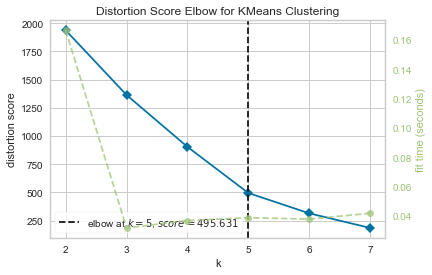

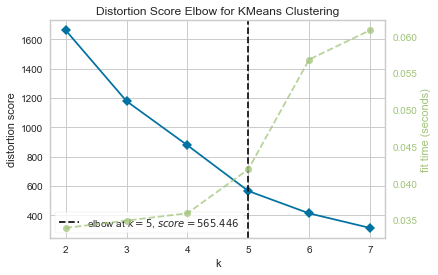

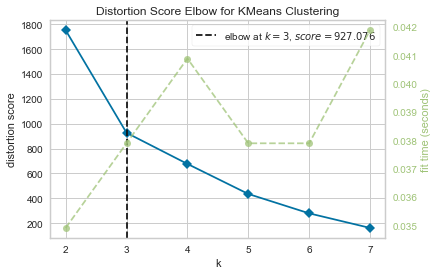

c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\abulf\Documents\Python_tutorial\Assignments\Machine_learning\myvenv\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


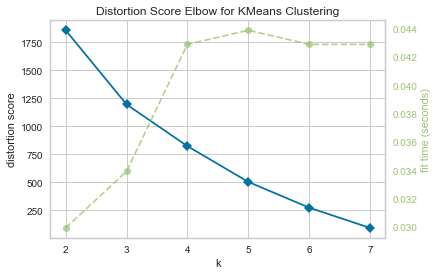

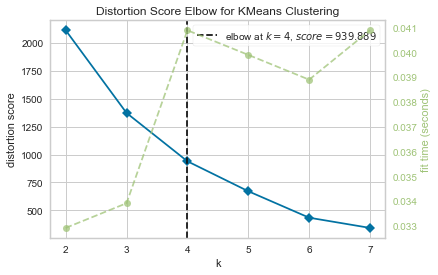

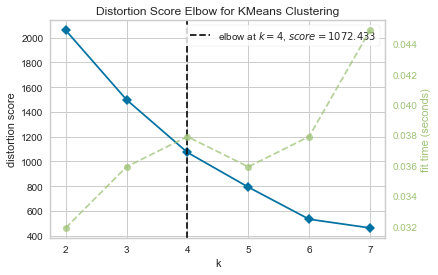

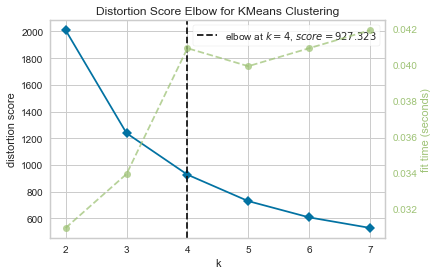

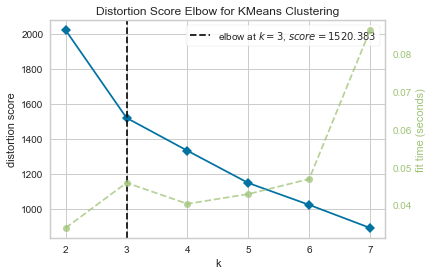

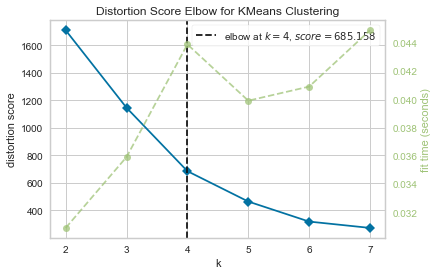

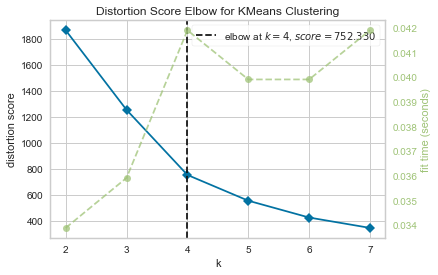

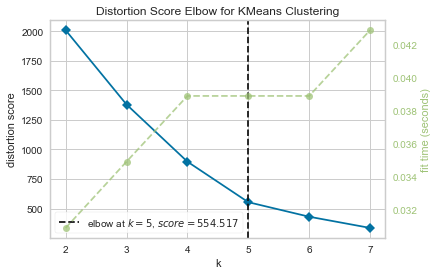

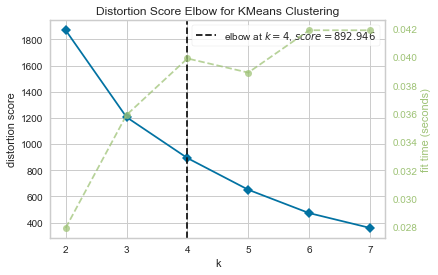

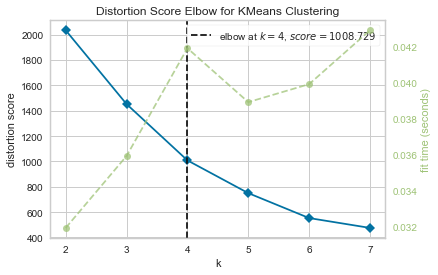

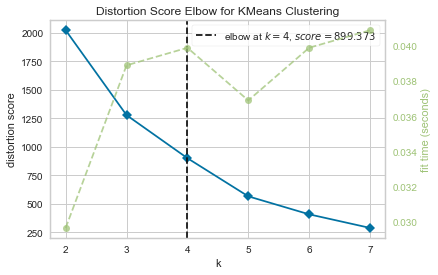

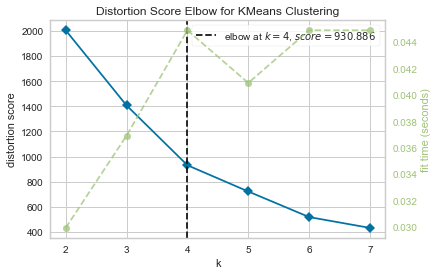

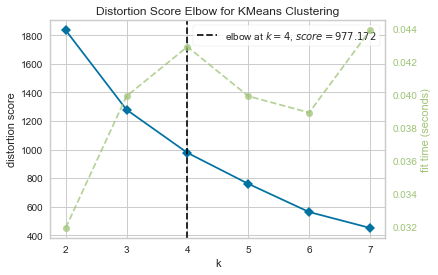

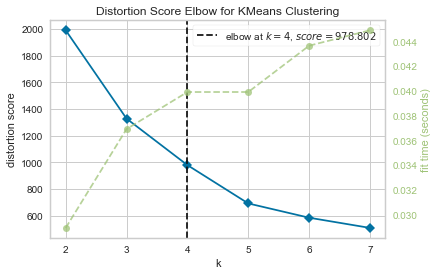

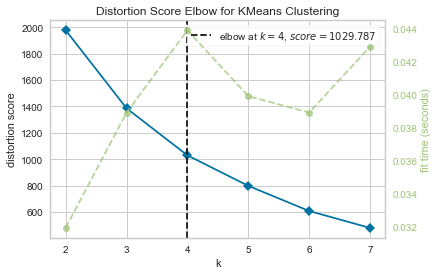

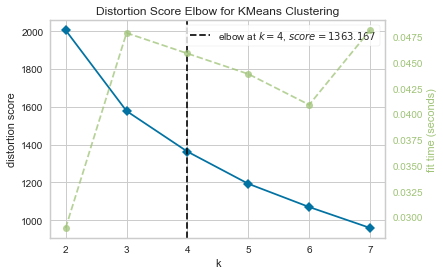

In [30]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
for df in ddf:
    Elbow_M = KElbowVisualizer(KMeans(), k=(2, 8))
    Elbow_M.fit(df)
    Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


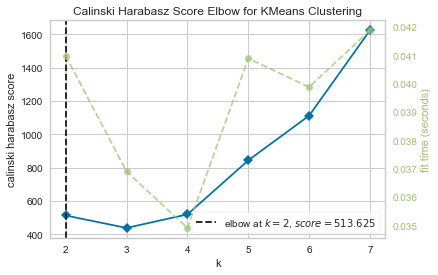

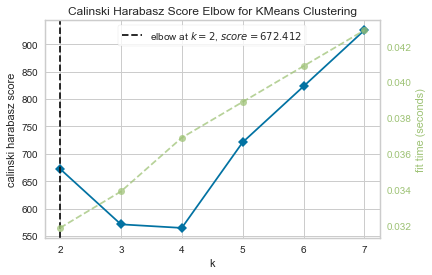

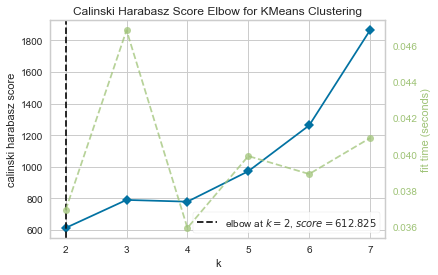

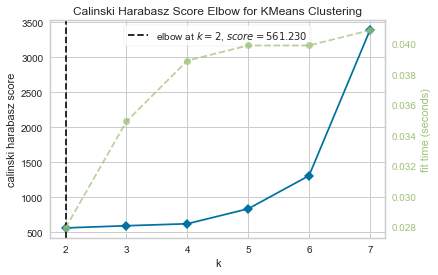

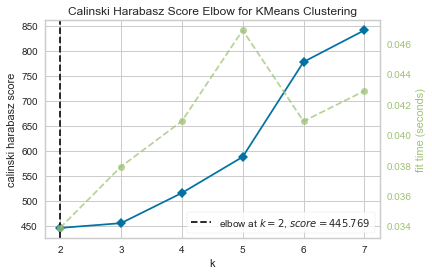

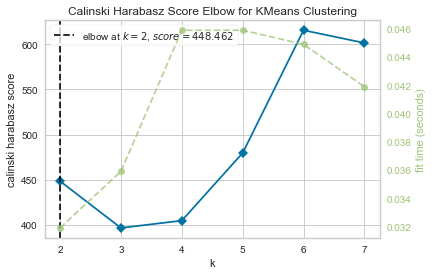

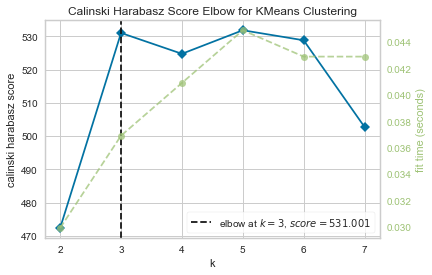

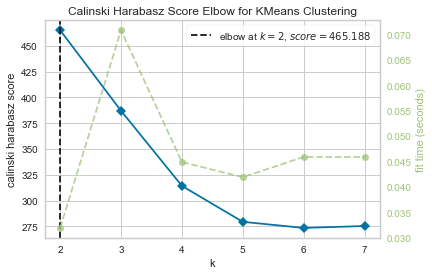

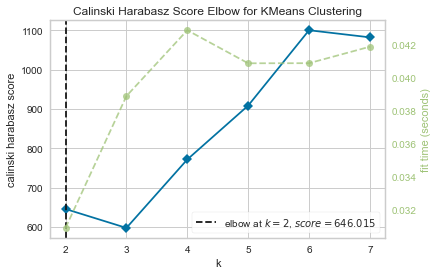

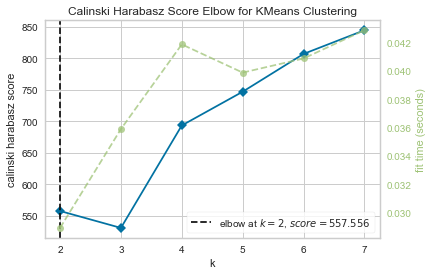

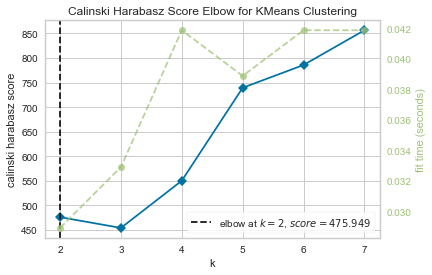

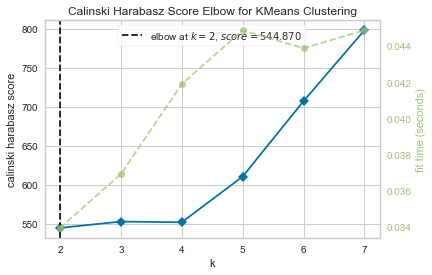

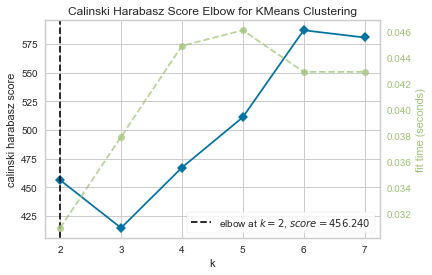

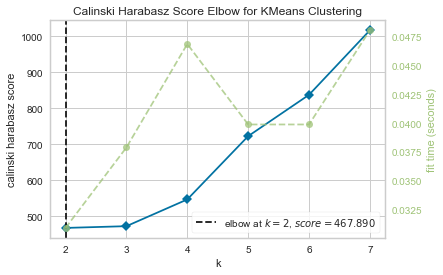

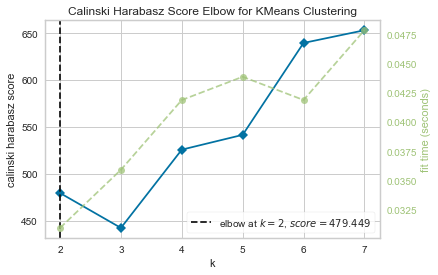

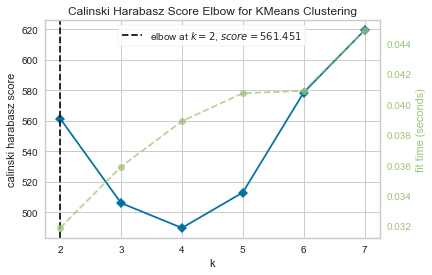

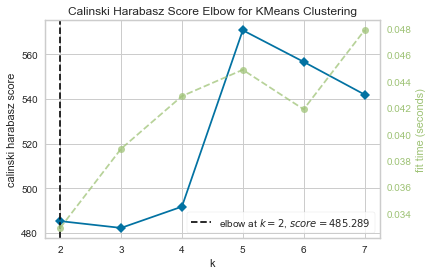

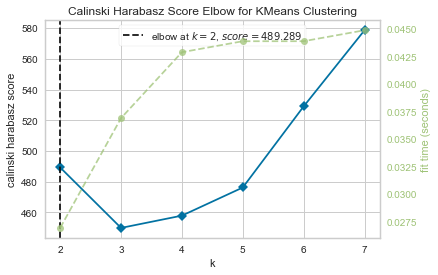

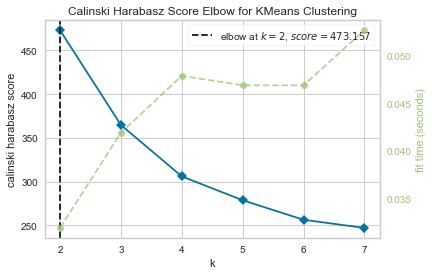

In [32]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
for df in ddf:
    Elbow_M = KElbowVisualizer(KMeans(), k=(2, 8), metric='calinski_harabasz')
    Elbow_M.fit(df)
    Elbow_M.show()

In [33]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for df in ddf:
    for num_clusters in range_n_clusters:
        
        # intialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
        kmeans.fit(df)
        
        cluster_labels = kmeans.labels_
        
        # silhouette score
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    print("new_df")

For n_clusters=2, the silhouette score is 0.4558088907895943
For n_clusters=3, the silhouette score is 0.4788309635324625
For n_clusters=4, the silhouette score is 0.5433084112739995
For n_clusters=5, the silhouette score is 0.6562277302289357
For n_clusters=6, the silhouette score is 0.71387816582799
For n_clusters=7, the silhouette score is 0.7534344356939118
For n_clusters=8, the silhouette score is 0.8271892887868478
new_df
For n_clusters=2, the silhouette score is 0.5175907533222296
For n_clusters=3, the silhouette score is 0.5041414515343221
For n_clusters=4, the silhouette score is 0.5038026293335455
For n_clusters=5, the silhouette score is 0.6045880880972149
For n_clusters=6, the silhouette score is 0.6457827696677373
For n_clusters=7, the silhouette score is 0.6929910177040978
For n_clusters=8, the silhouette score is 0.7158533664964146
new_df
For n_clusters=2, the silhouette score is 0.5355036271250325
For n_clusters=3, the silhouette score is 0.6074099898157875
For n_cluste

In [34]:
df = ddf[0]

In [35]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [36]:
df['Clusters'] = kmeans.labels_

In [37]:
print(df.to_string())

         mean       std  kurtosis      skew       min       max  player_name  Clusters
0    1.033970 -1.256497 -0.397320  0.103574  0.943566  0.152037            0         2
1    1.028270 -1.256659 -0.400819  0.097570  0.942808  0.150727            0         2
2    1.007246 -1.220574 -0.379639  0.090788  0.942579  0.151859            0         2
3    1.009589 -1.216973 -0.395576  0.087983  0.943286  0.156466            0         2
4    1.001035 -1.217856 -0.395388  0.084434  0.943213  0.153993            0         2
5    0.979711 -1.234995 -0.352047  0.080776  0.943130  0.151471            0         2
6    0.973781 -1.204881 -0.348244  0.074310  0.942288  0.150048            0         2
7    0.964377 -1.174879 -0.330641  0.072334  0.942173  0.150048            0         2
8    0.973565 -1.176662 -0.354792  0.070159  0.942932  0.151051            0         2
9    0.969492 -1.141925 -0.354466  0.070081  0.942797  0.151067            0         2
10   0.964492 -1.178337 -0.351731  0.067625

In [40]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

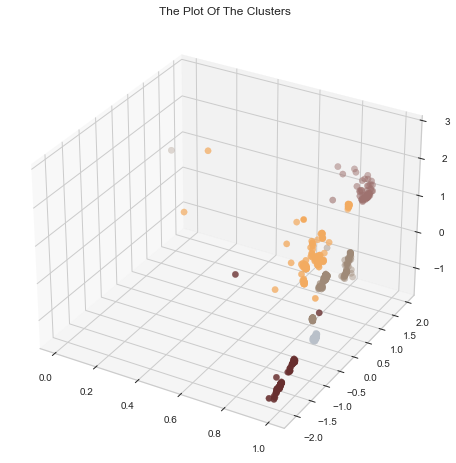

In [47]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df['min'], df['kurtosis'], df['std'], s=40, c=df["Clusters"], marker='o', cmap = cmap )#, df['max'], df['mean'], df['kurtosis'], df['std'], df['skew']
ax.set_title("The Plot Of The Clusters")
plt.show()

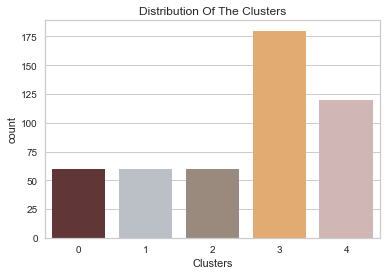

In [48]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#D6B2B1"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='mean'>

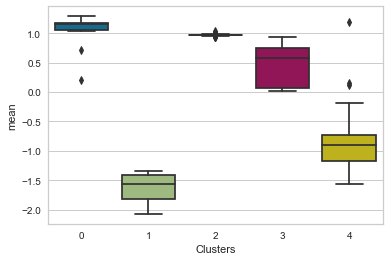

In [49]:
sns.boxplot(x='Clusters', y='mean', data=df)

<AxesSubplot:xlabel='Clusters', ylabel='min'>

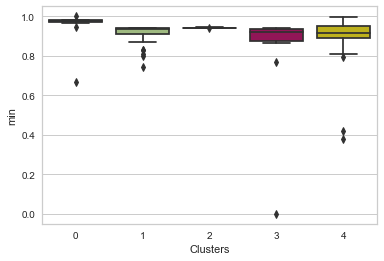

In [50]:
sns.boxplot(x='Clusters', y='min', data=df)

<AxesSubplot:xlabel='Clusters', ylabel='skew'>

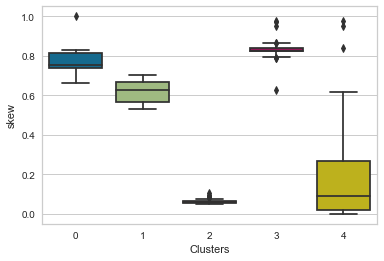

In [51]:
sns.boxplot(x='Clusters', y='skew', data=df)

<AxesSubplot:xlabel='Clusters', ylabel='max'>

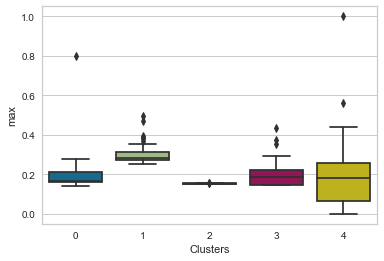

In [52]:
sns.boxplot(x='Clusters', y='max', data=df)

<AxesSubplot:xlabel='Clusters', ylabel='std'>

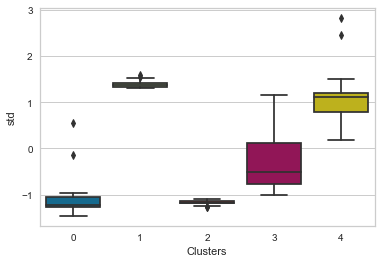

In [53]:
sns.boxplot(x='Clusters', y='std', data=df)

<AxesSubplot:xlabel='Clusters', ylabel='kurtosis'>

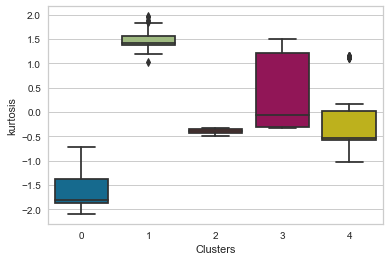

In [54]:
sns.boxplot(x='Clusters', y='kurtosis', data=df)